# 1. Diseñar una capa en keras que transforme imágenes a color en escala de grises. Pueden usar la base de datos mnist o cualquier otra para hacer las pruebas.

En esta parte creamos la caa usando la funcion rgb_to_grayscale de tf y cargamos mnist para hacer la prueba, al ser mnist de 28x28 usamos esas dimensiones

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

class RGBToGrayscale(layers.Layer):
    def __init__(self, **kwargs):
        super(RGBToGrayscale, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.image.rgb_to_grayscale(inputs)




# Cargar MNIST
(x_train, y_train), _ = keras.datasets.mnist.load_data()

# Normalizar
x_train = x_train.astype("float32") / 255.0
→
# Transformamos el canal a (28,28,1)
x_train = np.expand_dims(x_train, axis=-1)

# Convertir a RGB replicando el canal, teniendo (28,28,3)
x_train_rgb = np.concatenate([x_train, x_train, x_train], axis=-1)

# modelo
inputs = keras.Input(shape=(28, 28, 3))
outputs = RGBToGrayscale()(inputs)
model = keras.Model(inputs, outputs)

gray_images = model.predict(x_train_rgb[:5])

print("Forma de salida:", gray_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Forma de salida: (5, 28, 28, 1)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rgb_to_grayscale                │ (None, 28, 28, 1)      │             0 │
│ (RGBToGrayscale)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Haremos una prueba visualizando dos imagenes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


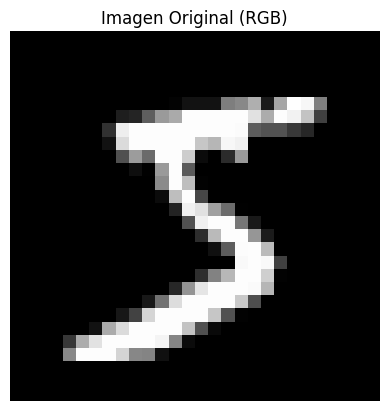

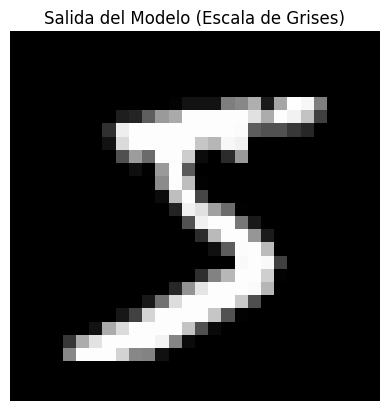

In [ ]:
import matplotlib.pyplot as plt


imagen_prueba = x_train_rgb[0:1]  # batch de tamaño 1

# Obtener salida del modelo
salida = model.predict(imagen_prueba)

# =========================
# Mostrar resultados
# =========================
plt.figure()
plt.title("Imagen Original (RGB)")
plt.imshow(imagen_prueba[0])
plt.axis("off")
plt.show()

plt.figure()
plt.title("Salida del Modelo (Escala de Grises)")
plt.imshow(salida[0].squeeze(), cmap="gray")
plt.axis("off")
plt.show()

Ya que mnist ya esta en blanco y negro no se nota el cambio, asi que vamos a usar otro dataset como CIFAR-10 el cual es una colección de 60,000 imágenes a color de 32x32 píxeles

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


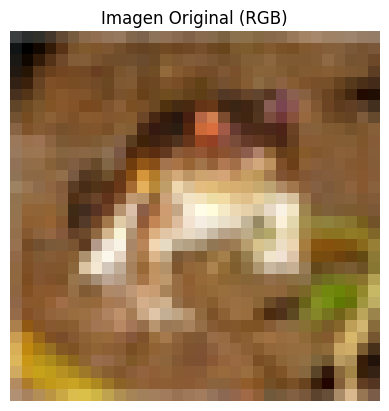

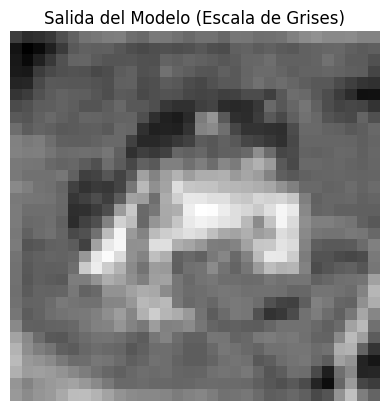

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


class RGBToGrayscale(layers.Layer):
    def call(self, inputs):
        return tf.image.rgb_to_grayscale(inputs)


(x_train, y_train), _ = keras.datasets.cifar10.load_data()

# Normalizar
x_train = x_train.astype("float32") / 255.0


# Crear modelo

inputs = keras.Input(shape=(32, 32, 3))
outputs = RGBToGrayscale()(inputs)
model = keras.Model(inputs, outputs)

#Prueba
imagen_prueba = x_train[0:1]  # batch de tamaño 1


salida = model.predict(imagen_prueba)


plt.figure()
plt.title("Imagen Original (RGB)")
plt.imshow(imagen_prueba[0])
plt.axis("off")
plt.show()

plt.figure()
plt.title("Salida del Modelo (Escala de Grises)")
plt.imshow(salida[0].squeeze(), cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
aqui podemos ver que el modelo funciona adecuadamente

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rgb_to_grayscale_1              │ (None, 32, 32, 1)      │             0 │
│ (RGBToGrayscale)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


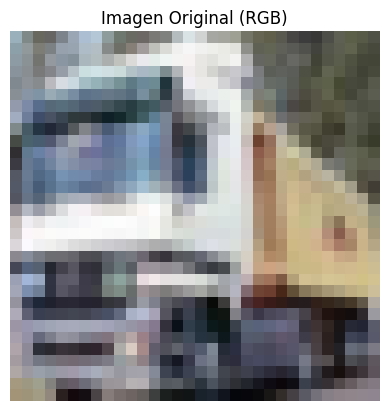

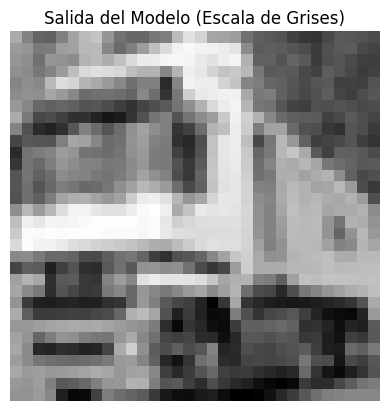

In [ ]:
imagen_prueba = x_train[1:2]  # batch de tamaño 1

# Obtener salida del modelo
salida = model.predict(imagen_prueba)

plt.figure()
plt.title("Imagen Original (RGB)")
plt.imshow(imagen_prueba[0])
plt.axis("off")
plt.show()

plt.figure()
plt.title("Salida del Modelo (Escala de Grises)")
plt.imshow(salida[0].squeeze(), cmap="gray")
plt.axis("off")
plt.show()

# 2. Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la gráfica de la función.  $$(a)  \hspace{73px}  3 sin(πx)$$  $$(b) \hspace{20px} 1 + 2x + 4x^3$$

usamos el codigo mostrado en clases adaptando la función objetivo

## a) 3 sin(πx)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

aqui modificamos la función objetivo

In [ ]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =100 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = 3*tf.math.sin(np.pi*x)
        #f = tf.math.pow(x,2.)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [ ]:
x=tf.random.uniform((3,2), minval=-1, maxval=1)
x.numpy()

array([[ 0.89887786,  0.3718841 ],
       [ 0.96755075,  0.11525607],
       [-0.13273382, -0.12414956]], dtype=float32)

In [ ]:
f = tf.math.pow(x,2.)
f.numpy()

array([[0.80798143, 0.1382978 ],
       [0.9361545 , 0.01328396],
       [0.01761827, 0.01541311]], dtype=float32)

In [ ]:
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.NONE
)

loss = mse(x, f)

print(loss)

tf.Tensor([0.03141236 0.00569202 0.02104175], shape=(3,), dtype=float32)


In [ ]:
tf.math.reduce_mean(tf.math.square(x-f))

<tf.Tensor: shape=(), dtype=float32, numpy=0.019382042810320854>

In [ ]:
model = Funsol()

creamos el modelo

In [ ]:
model.add(Dense(600,activation='tanh', input_shape=(1,)))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "funsol"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 600)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       120,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 600)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │       120,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,206 (2.47 MB)

 Trainable params: 323,602 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,604 (1.23 MB)

distintas pruebas llegaron a la conclusión de que bajar el ln ayuda a una mejor convergencia

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [ ]:
x=tf.linspace(-1,1,100)

aqui probamos con muchas epochs para ver que tal funciona

In [ ]:
history = model.fit(x,epochs=10000,verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss'])


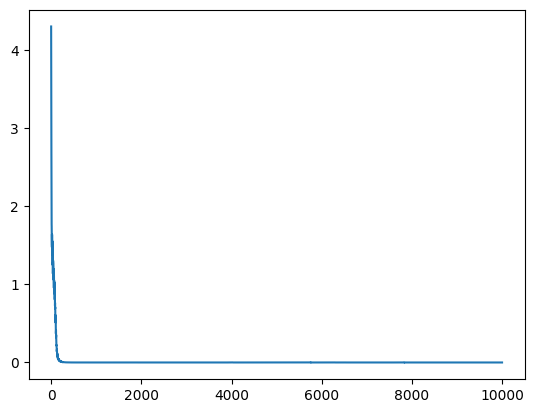

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
a=model.predict(x)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


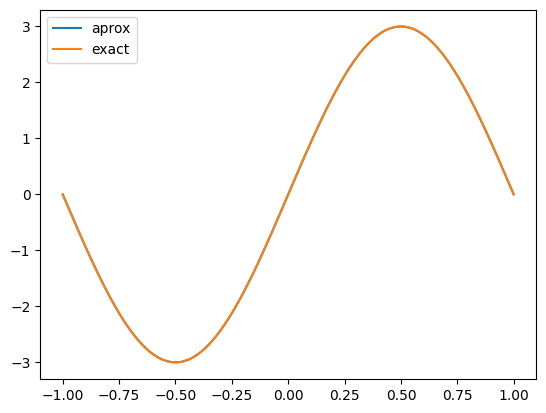

In [ ]:
plt.plot(x,a,label="aprox")
plt.plot(x, 3.*tf.math.sin(np.pi*x), label="exact")
plt.legend()
plt.show()

podemos ver que se obtiene resultados excelentes

se repite el mismo proceso para esta modificando la función objetivo

## $(b) \hspace{20px} 1 + 2x + 4x^3$

In [ ]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =100 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = 1+2*x+4*(x**3)
        #f = tf.math.pow(x,2.)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [ ]:
model = Funsol()

usamos el mismo modelo

In [ ]:
model.add(Dense(600,activation='tanh', input_shape=(1,)))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "funsol_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 600)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │       120,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,801 (632.04 KB)

 Trainable params: 161,801 (632.04 KB)

 Non-trainable params: 0 (0.00 B)

bajamos el ln y probamos con menos epoch ya que la función de perdida anterior disminuye muy rápido y después no baja tanto

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [ ]:
x=tf.linspace(-1,1,100)

In [ ]:
history = model.fit(x,epochs=1000,verbose=0)

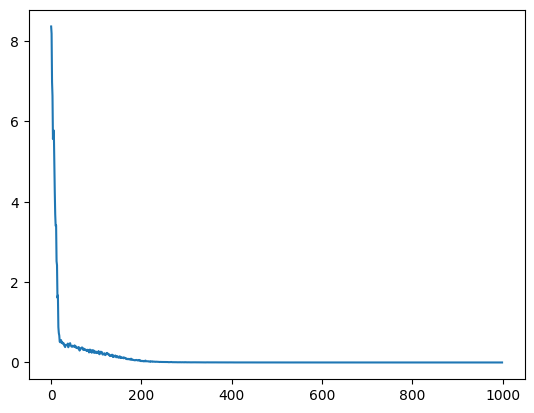

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
a=model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


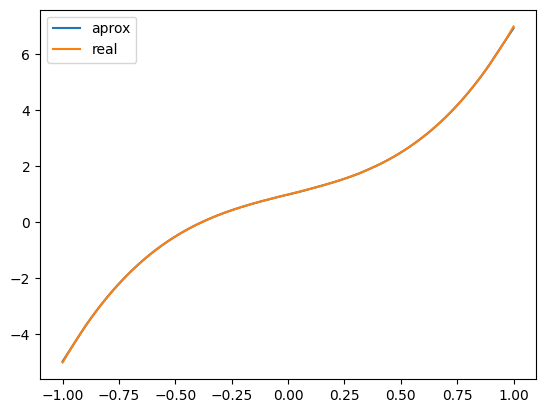

In [ ]:
plt.plot(x,a,label="aprox")
plt.plot(x, 1+2*x+4*(x**3),label="real")
plt.legend()
plt.show()

se obtiene un resultado mejor con solo el 10% de las epochs

# 3. Diseñar una capa entrenable que represente un polinomio grado 3: $f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$. Los parámetros entrenables son los coeficientes $a_0, a_1, a_2, a_3$. Posteriormente, entrenarla para ajustarla a la función $f(x) =cos(2x)$ en el intervalo [-1,1].

para este nos basamos en un ejercicio visto en clase con la función sin, pero adaptandolo a un polinomio de grado 3

In [ ]:
loss_tracker = keras.metrics.Mean(name="loss")

class Funsol(keras.Sequential):
    @property
    def metrics(self):
        return [loss_tracker]

    def train_step(self, data):
        batch_size = 10

        # Rango más pequeño para mejor aproximación
        x = tf.random.uniform((batch_size, 1), minval=-1, maxval=1)

        # Función objetivo: coseno
        f = tf.math.cos(2*x)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = tf.reduce_mean(tf.square(y_pred - f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

definimos la clase Poly3 donde tendremos nuestro polinomio de grado 3

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

class Poly3(keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        # Coeficientes entrenables
        self.a0 = self.add_weight(
            name="a0", shape=(1,), initializer="random_normal", trainable=True
        )
        self.a1 = self.add_weight(
            name="a1", shape=(1,), initializer="random_normal", trainable=True
        )
        self.a2 = self.add_weight(
            name="a2", shape=(1,), initializer="random_normal", trainable=True
        )
        self.a3 = self.add_weight(
            name="a3", shape=(1,), initializer="random_normal", trainable=True
        )

    def call(self, x):
        return self.a0 + self.a1*x + self.a2*x**2 + self.a3*x**3

hacemos la partición y obtenemos los datos de entrenamiento

In [ ]:
x_train = np.linspace(-1, 1, 500).reshape(-1,1)
y_train = np.cos(2*x_train)

definimos la función usando como referencia la clase Poly3 definida anteriormente

In [ ]:
model = Funsol([
    keras.Input(shape=(1,)),
    Poly3()
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.05),
    loss="mse"
)

In [ ]:
model.summary()

Model: "funsol_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ poly3_1 (Poly3)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

entrenamos el modelo con 1000 epocas

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

imprimimos los coeficientes

In [ ]:
layer = model.layers[0]
print("Coeficientes aprendidos:")
print("a0 =", layer.a0.numpy())
print("a1 =", layer.a1.numpy())
print("a2 =", layer.a2.numpy())
print("a3 =", layer.a3.numpy())

Coeficientes aprendidos:
a0 = [0.93933463]
a1 = [-0.0201689]
a2 = [-1.454858]
a3 = [-0.04106839]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


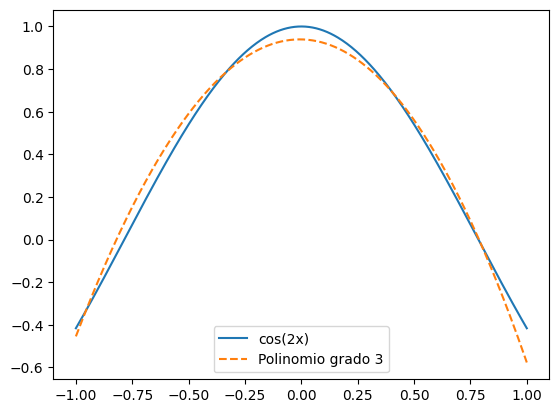

In [ ]:
x_test = np.linspace(-1, 1, 500).reshape(-1,1)
y_true = np.cos(2*x_test)
y_pred = model.predict(x_test)

plt.plot(x_test, y_true, label="cos(2x)")
plt.plot(x_test, y_pred, "--", label="Polinomio grado 3")
plt.legend()
plt.show()

la aproximación es bastante buena considerando que aproximamos una función coseno con un polinomio de grado 3

# 4. Entrenar una red neuronal que de la solución de las siguientes ecuaciones diferenciales en el el intervalo [-5,5]. Graficar la solución numérica junto con la solución analítica. $$(a) \hspace{135px} xy′ + y = x 2 cos (x) \text{ con } y(0) = 0$$ $$(b) \hspace{20px}d 2y dx2 = −y \text{ con } y'(0) = 1, y(0) = −0.5$$

## $(a) \hspace{20px} xy′ + y = x 2 cos (x) \text{ con } y(0) = 0$

en este caso nos basamos en el código para resolver EDO visto en clases, cambiando la función objetivo y la condición inicial

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = x * dy + y_pred - x**2 * tf.cos(x) #función objetivo
             ic = 0. #valor inicial
             loss = self.mse(0., eq) + self.mse(y_o,ic)


         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

         self.loss_tracker.update_state(loss)

         return {"loss": self.loss_tracker.result()}

creamos el modelo

In [ ]:
model = ODEsolver()

model.add(Dense(32, activation='tanh', input_shape=(1,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))


model.summary()

Model: "od_esolver_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

haciendo distintas pruebas notamos que un ln bajo nuevamente ayuda al modelo a obtener un mejor resultado

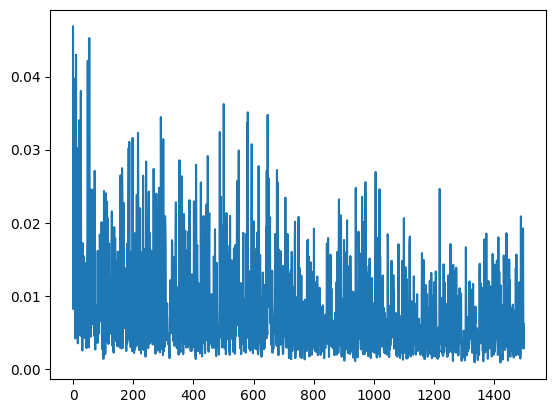

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),metrics=['loss'])

x=tf.linspace(-5,5,100)
history = model.fit(x,epochs=1500,verbose=0)
plt.plot(history.history["loss"])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


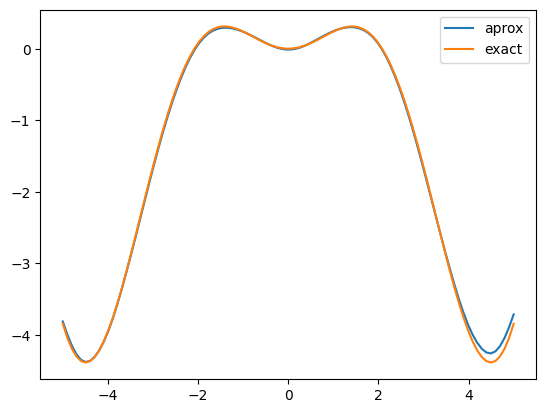

In [ ]:
x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,x_testv*np.sin(x_testv)+2*np.cos(x_testv)-2*np.sin(x_testv)/x_testv,label="exact")
plt.legend()
plt.show()

para graficar se obtuvo la solución análiticamente y se comparo con el modelo

## $(b) \hspace{20px}d 2y dx2 = −y \text{ con } y'(0) = 1, y(0) = −0.5$

en esta parte tenemos que usar más GradientTape para añadir la segunda derivada y algo muy importante es usar el watch para poder utilizarlos más adelante

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class ODEsolver(tf.keras.Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):

        batch_size = 64
        x = tf.random.uniform((batch_size, 1), -5., 5.)

        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x)
                with tf.GradientTape() as tape3:
                    tape3.watch(x)
                    y_pred = self(x, training=True)
                dy = tape3.gradient(y_pred, x)
            d2y = tape2.gradient(dy, x)

            eq = d2y + y_pred

            # Condiciones iniciales
            x0 = tf.zeros((1,1))

            with tf.GradientTape() as tape_ic:
                tape_ic.watch(x0)
                y0 = self(x0, training=True)
            dy0 = tape_ic.gradient(y0, x0)

            ic1 = tf.constant([[-0.5]], dtype=tf.float32)
            ic2 = tf.constant([[1.0]], dtype=tf.float32)

            loss = (
                self.mse(tf.zeros_like(eq), eq) +
                self.mse(ic1, y0) +
                self.mse(ic2, dy0)
            )

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}


Creamos el modelo pero añadimos una capa extra por la complejidad de este modelo y añadimos más neuronas a 256

In [17]:
model = ODEsolver()
model.add(tf.keras.layers.Dense(128, activation='tanh', input_shape=(1,)))
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "od_esolver_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,409 (130.50 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 0 (0.00 B)

nuevamente bajamos el ln y usamos Adam como optimizador y aumentamos las epochs

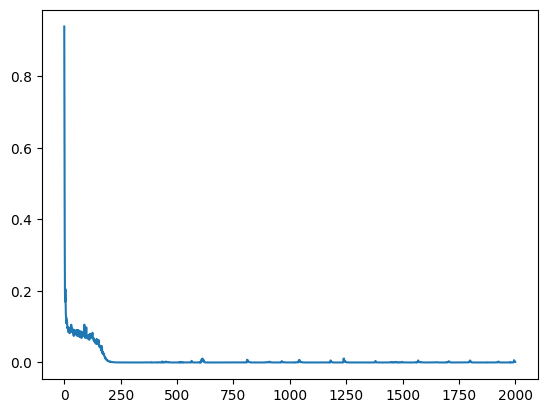

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

# Entrenamiento
x_dummy = tf.linspace(-5., 5., 100)
history = model.fit(x_dummy, epochs=2000, verbose=0)

plt.plot(history.history["loss"])
plt.show()

graficamos obteniendo la solución real de forma análitica.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


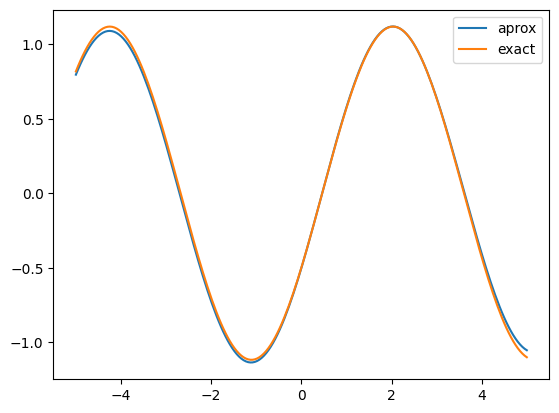

In [19]:
# Evaluación
x_test = tf.linspace(-5., 5., 200)
y_pred = model.predict(x_test)

x_np = x_test.numpy()

plt.plot(x_np, y_pred.squeeze(), label="aprox")
plt.plot(x_np, -0.5*np.cos(x_np)+np.sin(x_np), label="exact")
plt.legend()
plt.show()

In [ ]:
la aproximación fue bastante decente